# British Airways: Booking Prediction Project

In this project, we use customer booking data to predict whether a user will complete a holiday booking.  
We train a machine learning model to identify key behavioral patterns and evaluate how predictive the data is.

## Goal

Use customer data to predict whether someone will complete a holiday booking.  
We’ll use a machine learning model (Random Forest) to find patterns and understand which features are the most predictive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Make plots look better
sns.set(style="whitegrid")

In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\khali\OneDrive\Documents\customer_booking.csv", encoding="ISO-8859-1")

# Display the shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
# make a copy of the data so we don't mess up the original
df_clean = df.copy()

# these are the columns with text that need to be converted into numbers
cat_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# use label encoder to turn categories into numbers
from sklearn.preprocessing import LabelEncoder
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    encoders[col] = le

In [11]:
# split into features (X) and target (y)
X = df_clean.drop(columns=['booking_complete'])
y = df_clean['booking_complete']

# split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# training the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# make predictions on the test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of class 1

# show classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# show confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# accuracy and AUC scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:

[[8395  125]
 [1313  167]]
Accuracy: 0.8562
ROC AUC Score: 0.7743073134754472


## Results Summary

- Accuracy: 85.6%  
- ROC AUC Score: 0.77  
- Model predicts non-bookers very well  
- Struggles more with predicting actual bookings (class 1), likely due to class imbalance

Could be improved using class balancing techniques, more features, or advanced models like XBoost.


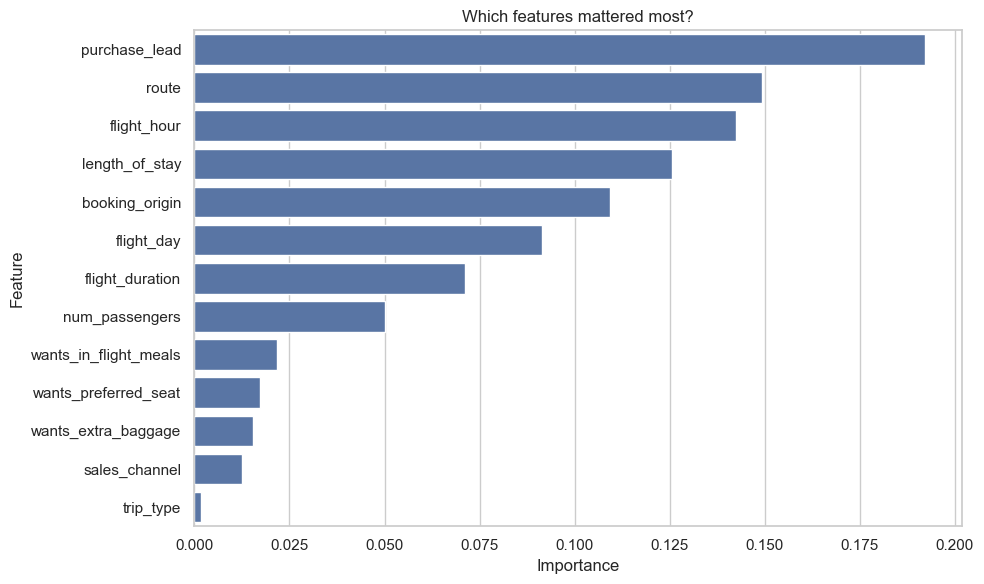

In [17]:
# get feature importance scores from the trained model
importances = rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]  # sort high to low

# plot them
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Which features mattered most?")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()